In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import joblib
import shap
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
TARGET_COLUMN = 'stress_level'
RANDOM_STATE = 42
DATA_PATH = Path('Data.csv')
DROPED_COLUMNS = ['id', 'happiness_score', 'focus_score', 'high_risk_flag', 'productivity_score', 'digital_dependence_score', 'anxiety_score', 'depression_score']
base_dir = Path.cwd()
output_dir = base_dir / "trained_models" / "classification"
output_dir.mkdir(parents=True, exist_ok=True)

In [3]:
df = pd.read_csv(DATA_PATH)
df = df.drop(columns=DROPED_COLUMNS)

output_feature = df[TARGET_COLUMN]
labels, bins = pd.qcut(output_feature, q=3, labels=['Low', 'Moderate', 'High'], retbins=True)
X = df.drop(TARGET_COLUMN,axis=1)
y = labels


In [4]:
pipeline = joblib.load(output_dir / "random_forest.joblib")
preprocessor = pipeline.named_steps['preprocessor']
rf_model = pipeline.named_steps['model']

In [5]:
# Transform data
X_transformed = preprocessor.fit_transform(X)

In [6]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_transformed)

In [7]:
numerical_features = X.select_dtypes(include=['number']).columns.tolist()
categorical_features = X.select_dtypes(exclude=['number']).columns.tolist()

onehot = preprocessor.named_transformers_['cat'].named_steps['onehot']
onehot_feature_names = onehot.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(onehot_feature_names)


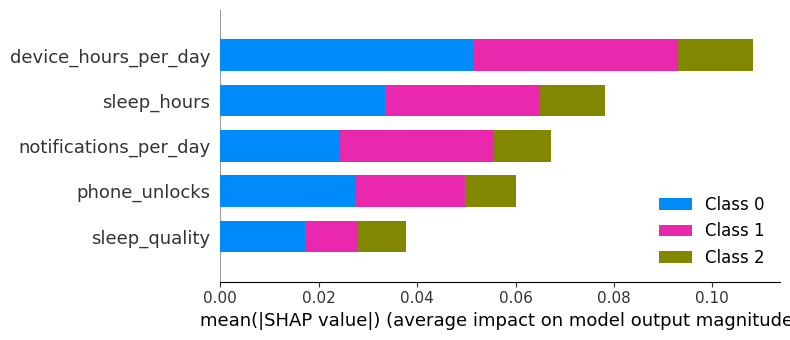

In [14]:
shap.summary_plot(shap_values, features=X_transformed, feature_names=feature_names,plot_type='bar', show=False, max_display=5) 

* As we can observe from the impact graph above, these 5 features are the most influence factors to `stress_level` output: `device_hours_per_day`, `sleep_hours`, `notifications_per_day`, `phone_unlocks`, `sleep_quality`
